In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder

In [3]:
master=pd.read_csv('master_dup_removed.csv')
master.head()

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,474.1,954.7,431722.3085,412508.1558,52096,579143.3085,1.104817,12,15,27
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,534.4,1007.6,551229.5244,511140.9554,61775,729961.5244,0.946018,12,3,15
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,624.5,875.2,484203.7432,488806.8270,55089,666343.7432,1.121519,7,8,15
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,488.8,952.1,490562.7749,424675.0400,57767,666421.7749,1.046196,14,9,23
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,683.6,941.4,549885.2510,473013.9161,60987,723713.2510,0.981137,17,12,29


In [4]:
master.shape

(1362, 136)

## Notes about the data
1- Sex column has F-M and female-male

2- Age doesn't look normally distributed --> Scaling

3- Is education level proportional to general population? Does it matter?

4- NEO-E Skewed norm dist

5- Only NeoC has a null value (1)


In [5]:
master['lh_bankssts_thickness'].isnull().sum()

0

<AxesSubplot:xlabel='NEO_N', ylabel='Count'>

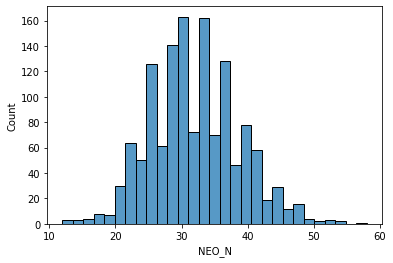

In [6]:
sns.histplot(master['NEO_N'])

In [7]:
master.describe()

,age,BMI,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
count,1353.000000,1353.000000,1362.000000,1362.000000,1362.000000,1362.000000,1361.000000,1362.000000,1362.000000,1362.000000,...,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000
mean,22.611604,23.452328,32.044053,42.367841,41.140969,41.480910,39.625276,2.612562,2.834280,2.668168,...,624.399192,963.657562,505229.693427,473428.713726,60587.881791,682682.797686,0.982964,21.950808,21.265786,43.216593
std,1.768582,4.461636,6.673963,5.752341,6.254869,5.790108,6.724346,0.150417,0.215096,0.148599,...,154.322225,158.217013,50983.978777,56343.418311,5150.041764,63571.059592,0.113214,12.559680,11.654838,23.134134
min,18.250000,0.000000,12.000000,19.000000,22.000000,25.000000,19.000000,2.112000,2.226000,2.214000,...,319.900000,401.700000,365486.667600,342083.173700,46019.000000,504960.667600,0.839635,0.000000,0.000000,3.000000
25%,21.250000,21.000000,27.000000,38.000000,37.000000,37.250000,35.000000,2.509000,2.685250,2.565000,...,508.750000,853.950000,469216.989425,432865.675975,56841.250000,636360.663350,0.900092,13.000000,12.000000,26.000000
50%,22.500000,23.000000,32.000000,43.000000,41.000000,42.000000,39.000000,2.611000,2.823000,2.671000,...,600.150000,951.350000,502938.890150,468810.834900,60534.500000,679474.039150,0.930576,20.000000,20.000000,41.500000
75%,24.000000,25.000000,36.000000,47.000000,46.000000,46.000000,44.000000,2.709000,2.968750,2.770750,...,717.075000,1057.650000,538850.629700,509955.141000,64040.250000,727203.990325,1.053637,29.000000,28.000000,56.000000
max,26.250000,47.000000,58.000000,58.000000,58.000000,58.000000,59.000000,3.164000,3.663000,3.169000,...,1482.400000,1614.400000,687593.232200,666177.675300,79412.000000,900769.417400,1.430946,120.000000,106.000000,226.000000


<AxesSubplot:xlabel='NEO_C', ylabel='Count'>

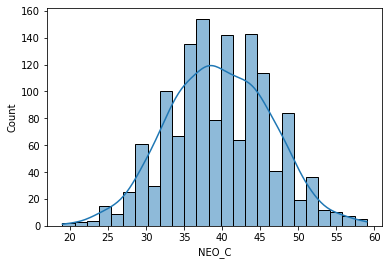

In [8]:
sns.histplot(master['NEO_C'],kde='True')

In [9]:
master['NEO_C'].mean()


39.62527553269655

In [10]:
master

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,474.1,954.7,431722.3085,412508.1558,52096,579143.3085,1.104817,12,15,27
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,534.4,1007.6,551229.5244,511140.9554,61775,729961.5244,0.946018,12,3,15
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,624.5,875.2,484203.7432,488806.8270,55089,666343.7432,1.121519,7,8,15
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,488.8,952.1,490562.7749,424675.0400,57767,666421.7749,1.046196,14,9,23
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,683.6,941.4,549885.2510,473013.9161,60987,723713.2510,0.981137,17,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,sub-1358,22.25,male,21.0,right,medium,40,39,47,38,...,898.8,887.2,517851.7456,517310.5024,66447,711842.7456,0.921517,19,23,42
1358,sub-1359,25.25,male,30.0,right,medium,28,41,48,34,...,848.9,853.7,519398.3571,565436.6994,65260,718521.3571,0.933091,20,34,54
1359,sub-1360,20.75,male,22.0,right,high,27,44,46,41,...,585.8,1128.7,567440.1256,469283.5790,61988,756582.1256,0.881901,20,33,53
1360,sub-1361,24.25,female,35.0,right,medium,35,32,44,45,...,825.9,1005.8,441752.2678,442438.1987,55159,595460.2678,1.003723,31,34,65


## Finding clusters

In [11]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA


In [12]:
clusters = KMeans(n_clusters=5)

In [13]:
X=master.drop(['NEO_N','NEO_C','NEO_A','NEO_E','NEO_O','participant_id'],axis=1)
X

,age,sex,BMI,handedness,education_category,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
0,26.25,F,24.0,right,applied,2.439,2.985,2.422,1.860,3.808,...,474.1,954.7,431722.3085,412508.1558,52096,579143.3085,1.104817,12,15,27
1,21.00,F,23.0,right,academic,2.820,2.684,2.642,2.008,3.573,...,534.4,1007.6,551229.5244,511140.9554,61775,729961.5244,0.946018,12,3,15
2,23.00,M,22.0,right,academic,2.365,2.832,2.538,1.864,3.479,...,624.5,875.2,484203.7432,488806.8270,55089,666343.7432,1.121519,7,8,15
3,23.50,F,22.0,right,applied,2.475,2.861,2.488,2.082,2.997,...,488.8,952.1,490562.7749,424675.0400,57767,666421.7749,1.046196,14,9,23
4,21.75,M,19.0,ambidextrous,applied,2.691,2.566,2.742,2.067,3.222,...,683.6,941.4,549885.2510,473013.9161,60987,723713.2510,0.981137,17,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,22.25,male,21.0,right,medium,2.799,2.628,2.885,1.807,3.288,...,898.8,887.2,517851.7456,517310.5024,66447,711842.7456,0.921517,19,23,42
1358,25.25,male,30.0,right,medium,2.603,2.538,2.538,1.882,3.729,...,848.9,853.7,519398.3571,565436.6994,65260,718521.3571,0.933091,20,34,54
1359,20.75,male,22.0,right,high,2.794,3.122,2.885,1.832,3.937,...,585.8,1128.7,567440.1256,469283.5790,61988,756582.1256,0.881901,20,33,53
1360,24.25,female,35.0,right,medium,2.442,2.708,2.645,1.744,3.163,...,825.9,1005.8,441752.2678,442438.1987,55159,595460.2678,1.003723,31,34,65


In [14]:
X['sex'].replace('F','female',inplace=True)
X

,age,sex,BMI,handedness,education_category,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
0,26.25,female,24.0,right,applied,2.439,2.985,2.422,1.860,3.808,...,474.1,954.7,431722.3085,412508.1558,52096,579143.3085,1.104817,12,15,27
1,21.00,female,23.0,right,academic,2.820,2.684,2.642,2.008,3.573,...,534.4,1007.6,551229.5244,511140.9554,61775,729961.5244,0.946018,12,3,15
2,23.00,M,22.0,right,academic,2.365,2.832,2.538,1.864,3.479,...,624.5,875.2,484203.7432,488806.8270,55089,666343.7432,1.121519,7,8,15
3,23.50,female,22.0,right,applied,2.475,2.861,2.488,2.082,2.997,...,488.8,952.1,490562.7749,424675.0400,57767,666421.7749,1.046196,14,9,23
4,21.75,M,19.0,ambidextrous,applied,2.691,2.566,2.742,2.067,3.222,...,683.6,941.4,549885.2510,473013.9161,60987,723713.2510,0.981137,17,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,22.25,male,21.0,right,medium,2.799,2.628,2.885,1.807,3.288,...,898.8,887.2,517851.7456,517310.5024,66447,711842.7456,0.921517,19,23,42
1358,25.25,male,30.0,right,medium,2.603,2.538,2.538,1.882,3.729,...,848.9,853.7,519398.3571,565436.6994,65260,718521.3571,0.933091,20,34,54
1359,20.75,male,22.0,right,high,2.794,3.122,2.885,1.832,3.937,...,585.8,1128.7,567440.1256,469283.5790,61988,756582.1256,0.881901,20,33,53
1360,24.25,female,35.0,right,medium,2.442,2.708,2.645,1.744,3.163,...,825.9,1005.8,441752.2678,442438.1987,55159,595460.2678,1.003723,31,34,65


In [15]:
X['sex'].replace('M','male',inplace=True)

In [16]:
X=pd.get_dummies(X)

In [17]:
cat_columns=['sex_female','sex_male','handedness_ambidextrous','handedness_left','handedness_right','education_category_academic','education_category_applied','education_category_high','education_category_low','education_category_medium']

In [18]:
cat_df=X[cat_columns]
cat_df

,sex_female,sex_male,handedness_ambidextrous,handedness_left,handedness_right,education_category_academic,education_category_applied,education_category_high,education_category_low,education_category_medium
0,1,0,0,0,1,0,1,0,0,0
1,1,0,0,0,1,1,0,0,0,0
2,0,1,0,0,1,1,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0
4,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1357,0,1,0,0,1,0,0,0,0,1
1358,0,1,0,0,1,0,0,0,0,1
1359,0,1,0,0,1,0,0,1,0,0
1360,1,0,0,0,1,0,0,0,0,1


In [19]:
X=X.drop(cat_columns,axis=1)
X

,age,BMI,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
0,26.25,24.0,2.439,2.985,2.422,1.860,3.808,2.592,2.348,2.531,...,474.1,954.7,431722.3085,412508.1558,52096,579143.3085,1.104817,12,15,27
1,21.00,23.0,2.820,2.684,2.642,2.008,3.573,2.838,2.564,2.706,...,534.4,1007.6,551229.5244,511140.9554,61775,729961.5244,0.946018,12,3,15
2,23.00,22.0,2.365,2.832,2.538,1.864,3.479,2.658,2.399,2.804,...,624.5,875.2,484203.7432,488806.8270,55089,666343.7432,1.121519,7,8,15
3,23.50,22.0,2.475,2.861,2.488,2.082,2.997,2.755,2.538,2.647,...,488.8,952.1,490562.7749,424675.0400,57767,666421.7749,1.046196,14,9,23
4,21.75,19.0,2.691,2.566,2.742,2.067,3.222,2.795,2.774,2.616,...,683.6,941.4,549885.2510,473013.9161,60987,723713.2510,0.981137,17,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,22.25,21.0,2.799,2.628,2.885,1.807,3.288,2.887,2.646,2.941,...,898.8,887.2,517851.7456,517310.5024,66447,711842.7456,0.921517,19,23,42
1358,25.25,30.0,2.603,2.538,2.538,1.882,3.729,2.760,2.388,2.724,...,848.9,853.7,519398.3571,565436.6994,65260,718521.3571,0.933091,20,34,54
1359,20.75,22.0,2.794,3.122,2.885,1.832,3.937,2.814,2.707,2.864,...,585.8,1128.7,567440.1256,469283.5790,61988,756582.1256,0.881901,20,33,53
1360,24.25,35.0,2.442,2.708,2.645,1.744,3.163,2.573,2.480,2.875,...,825.9,1005.8,441752.2678,442438.1987,55159,595460.2678,1.003723,31,34,65


In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X=pd.DataFrame(imputer.fit_transform(X),columns=X.columns)
X

,age,BMI,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
0,26.25,24.0,2.439,2.985,2.422,1.860,3.808,2.592,2.348,2.531,...,474.1,954.7,431722.3085,412508.1558,52096.0,579143.3085,1.104817,12.0,15.0,27.0
1,21.00,23.0,2.820,2.684,2.642,2.008,3.573,2.838,2.564,2.706,...,534.4,1007.6,551229.5244,511140.9554,61775.0,729961.5244,0.946018,12.0,3.0,15.0
2,23.00,22.0,2.365,2.832,2.538,1.864,3.479,2.658,2.399,2.804,...,624.5,875.2,484203.7432,488806.8270,55089.0,666343.7432,1.121519,7.0,8.0,15.0
3,23.50,22.0,2.475,2.861,2.488,2.082,2.997,2.755,2.538,2.647,...,488.8,952.1,490562.7749,424675.0400,57767.0,666421.7749,1.046196,14.0,9.0,23.0
4,21.75,19.0,2.691,2.566,2.742,2.067,3.222,2.795,2.774,2.616,...,683.6,941.4,549885.2510,473013.9161,60987.0,723713.2510,0.981137,17.0,12.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,22.25,21.0,2.799,2.628,2.885,1.807,3.288,2.887,2.646,2.941,...,898.8,887.2,517851.7456,517310.5024,66447.0,711842.7456,0.921517,19.0,23.0,42.0
1358,25.25,30.0,2.603,2.538,2.538,1.882,3.729,2.760,2.388,2.724,...,848.9,853.7,519398.3571,565436.6994,65260.0,718521.3571,0.933091,20.0,34.0,54.0
1359,20.75,22.0,2.794,3.122,2.885,1.832,3.937,2.814,2.707,2.864,...,585.8,1128.7,567440.1256,469283.5790,61988.0,756582.1256,0.881901,20.0,33.0,53.0
1360,24.25,35.0,2.442,2.708,2.645,1.744,3.163,2.573,2.480,2.875,...,825.9,1005.8,441752.2678,442438.1987,55159.0,595460.2678,1.003723,31.0,34.0,65.0


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)


StandardScaler()

In [22]:
X = pd.DataFrame(scaler.transform(X), columns=X.columns)
X

,age,BMI,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
0,2.065224,0.123873,-1.154297,0.700966,-1.657200,-0.138731,1.218101,-1.749511,-1.826088,-2.125579,...,-0.974289,-0.056636,-1.442304,-1.081634,-1.649501,-1.629319,1.076704,-0.792573,-0.537810,-0.701239
1,-0.914174,-0.101080,1.379588,-0.698924,-0.176164,0.731118,0.379510,0.345647,0.136311,-0.850604,...,-0.583404,0.277837,0.902572,0.669574,0.230591,0.743988,-0.326462,-0.792573,-1.567803,-1.220143
2,0.220835,-0.326033,-1.646443,-0.010606,-0.876290,-0.115221,0.044074,-1.187395,-1.362744,-0.136618,...,0.000653,-0.559295,-0.412555,0.273036,-1.068128,-0.257115,1.224284,-1.190819,-1.138639,-1.220143
3,0.504587,-0.326033,-0.914875,0.124267,-1.212889,1.166042,-1.675928,-0.361255,-0.099904,-1.280453,...,-0.878998,-0.073076,-0.287783,-0.865613,-0.547941,-0.255887,0.558722,-0.633275,-1.052807,-0.874207
4,-0.488545,-1.000891,0.521658,-1.247717,0.497035,1.077882,-0.873023,-0.020579,2.044199,-1.506305,...,0.383759,-0.140729,0.876196,-0.007365,0.077527,0.645664,-0.016147,-0.394327,-0.795308,-0.614755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,-0.204793,-0.550986,1.239925,-0.959368,1.459709,-0.450230,-0.637504,0.762976,0.881296,0.861505,...,1.778756,-0.483422,0.247660,0.779113,1.138102,0.458867,-0.542956,-0.235029,0.148852,-0.052608
1358,1.497720,1.473589,-0.063596,-1.377940,-0.876290,-0.009429,0.936191,-0.318671,-1.462681,-0.719464,...,1.455288,-0.695235,0.278006,1.633585,0.907533,0.563963,-0.440686,-0.155380,1.093013,0.466297
1359,-1.056050,-0.326033,1.206672,1.338124,1.459709,-0.303297,1.678433,0.141242,1.435492,0.300516,...,-0.250213,1.043523,1.220644,-0.073596,0.271965,1.162895,-0.893007,-0.155380,1.007180,0.423055
1360,0.930216,2.598353,-1.134345,-0.587305,-0.155968,-0.820504,-1.083562,-1.911332,-0.626844,0.380658,...,1.306194,0.266456,-1.245504,-0.550231,-1.054530,-1.372552,0.183426,0.720760,1.093013,0.941959


In [23]:
pca=PCA()

In [24]:
pca.fit(X)

PCA()

In [25]:
X.shape

(1362, 127)

In [26]:
X_proj = pca.transform(X)
X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, 128)])
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127
0,-12.034256,0.909252,-0.572459,0.505446,2.954554,-0.241447,-0.126430,-0.400341,-0.068412,2.019619,...,-0.031500,-0.008303,-0.000058,-0.015125,0.005128,-1.956213e-16,3.315597e-16,-1.241266e-16,5.639151e-16,1.515443e-16
1,-2.471574,-2.178643,4.318714,-0.888753,2.202738,0.062792,-0.543997,0.019002,-1.040255,1.308924,...,-0.007339,0.005566,-0.015742,-0.002788,-0.002647,3.744478e-17,-4.073570e-16,8.203170e-17,-2.594433e-16,1.371250e-15
2,-5.903041,-0.082405,0.505151,-2.646178,2.480699,-0.225929,-1.744834,1.541358,-0.455755,-2.837094,...,-0.042495,0.072141,0.003536,0.006085,0.000309,-7.357753e-17,-1.905529e-16,6.016538e-16,-7.119311e-16,-1.313237e-16
3,-4.978952,1.769748,4.074057,-3.069478,1.919276,-1.071896,-0.183133,0.768298,0.002147,1.280960,...,-0.110016,-0.042184,-0.023823,0.000946,0.001050,-7.913349e-16,7.395341e-16,-6.217221e-16,1.110758e-15,-6.158933e-16
4,0.073838,1.308774,4.407035,-2.890325,2.774418,0.159208,-0.252484,1.547234,-0.872514,-1.413170,...,0.003283,0.011492,-0.027890,0.004729,0.004266,-7.859429e-16,-1.244090e-15,1.055240e-15,-6.602932e-16,9.012632e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,7.255837,-1.449463,-0.850028,0.083323,-1.188779,0.798525,-0.886744,1.434432,-2.421640,-0.880553,...,0.073059,-0.042812,-0.014098,0.001103,-0.001743,1.082350e-15,2.242598e-17,-3.316142e-16,3.669727e-16,4.441477e-16
1358,-0.907732,-8.184974,-2.406174,-2.585677,-3.145584,-0.762025,-1.837276,1.810888,-0.195988,-2.564608,...,-0.016326,-0.035421,-0.036019,0.009458,0.000539,1.954155e-16,-2.299727e-17,3.575343e-17,-5.655790e-16,1.054397e-15
1359,6.975078,1.540350,1.616992,2.876094,3.498311,1.273568,-0.165914,-0.436025,-0.197298,0.582385,...,0.090915,-0.026108,-0.003184,-0.009163,-0.000491,2.130205e-16,-8.019377e-16,6.710042e-16,1.439847e-16,5.123777e-16
1360,-2.984389,-0.174013,-5.901372,-4.900268,0.718758,2.423440,1.555889,0.443164,-0.550473,1.092030,...,-0.066902,-0.044194,-0.084427,0.013662,-0.000498,-6.643739e-16,2.828721e-16,3.750287e-16,-3.499159e-16,-3.085181e-16


In [27]:
X_proj=pd.concat([X_proj,cat_df],axis=1)

In [28]:
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,sex_female,sex_male,handedness_ambidextrous,handedness_left,handedness_right,education_category_academic,education_category_applied,education_category_high,education_category_low,education_category_medium
0,-12.034256,0.909252,-0.572459,0.505446,2.954554,-0.241447,-0.126430,-0.400341,-0.068412,2.019619,...,1,0,0,0,1,0,1,0,0,0
1,-2.471574,-2.178643,4.318714,-0.888753,2.202738,0.062792,-0.543997,0.019002,-1.040255,1.308924,...,1,0,0,0,1,1,0,0,0,0
2,-5.903041,-0.082405,0.505151,-2.646178,2.480699,-0.225929,-1.744834,1.541358,-0.455755,-2.837094,...,0,1,0,0,1,1,0,0,0,0
3,-4.978952,1.769748,4.074057,-3.069478,1.919276,-1.071896,-0.183133,0.768298,0.002147,1.280960,...,1,0,0,0,1,0,1,0,0,0
4,0.073838,1.308774,4.407035,-2.890325,2.774418,0.159208,-0.252484,1.547234,-0.872514,-1.413170,...,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,7.255837,-1.449463,-0.850028,0.083323,-1.188779,0.798525,-0.886744,1.434432,-2.421640,-0.880553,...,0,1,0,0,1,0,0,0,0,1
1358,-0.907732,-8.184974,-2.406174,-2.585677,-3.145584,-0.762025,-1.837276,1.810888,-0.195988,-2.564608,...,0,1,0,0,1,0,0,0,0,1
1359,6.975078,1.540350,1.616992,2.876094,3.498311,1.273568,-0.165914,-0.436025,-0.197298,0.582385,...,0,1,0,0,1,0,0,1,0,0
1360,-2.984389,-0.174013,-5.901372,-4.900268,0.718758,2.423440,1.555889,0.443164,-0.550473,1.092030,...,1,0,0,0,1,0,0,0,0,1


In [29]:
clusters.fit(X_proj)

KMeans(n_clusters=5)

In [30]:
clusters.fit_transform(X_proj)

array([[14.310981  , 13.08264684, 17.27242787, 19.84893497,  8.93902216],
       [ 8.89495007, 11.2360712 , 10.56891916, 13.13439482, 10.01183925],
       [11.09623937, 10.64789597, 13.12735465, 15.25932075,  9.22044719],
       ...,
       [12.56645246, 13.57258785, 12.14306478,  8.99586694, 17.39748569],
       [14.16158433,  9.29932552, 12.90625492, 14.24588653, 12.96404041],
       [12.66177423, 12.99174802, 10.37482166,  8.09125276, 17.46605543]])

In [31]:
target_label=clusters.labels_

In [32]:
target_label

array([4, 0, 4, ..., 3, 1, 3], dtype=int32)

In [33]:
master['target']=target_label
master

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,target
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,954.7,431722.3085,412508.1558,52096,579143.3085,1.104817,12,15,27,4
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,1007.6,551229.5244,511140.9554,61775,729961.5244,0.946018,12,3,15,0
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,875.2,484203.7432,488806.8270,55089,666343.7432,1.121519,7,8,15,4
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,952.1,490562.7749,424675.0400,57767,666421.7749,1.046196,14,9,23,0
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,941.4,549885.2510,473013.9161,60987,723713.2510,0.981137,17,12,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,sub-1358,22.25,male,21.0,right,medium,40,39,47,38,...,887.2,517851.7456,517310.5024,66447,711842.7456,0.921517,19,23,42,3
1358,sub-1359,25.25,male,30.0,right,medium,28,41,48,34,...,853.7,519398.3571,565436.6994,65260,718521.3571,0.933091,20,34,54,2
1359,sub-1360,20.75,male,22.0,right,high,27,44,46,41,...,1128.7,567440.1256,469283.5790,61988,756582.1256,0.881901,20,33,53,3
1360,sub-1361,24.25,female,35.0,right,medium,35,32,44,45,...,1005.8,441752.2678,442438.1987,55159,595460.2678,1.003723,31,34,65,1


In [34]:
master.target.value_counts()

1    336
3    313
2    273
4    220
0    220
Name: target, dtype: int64

## Random Forest - fcd

In [35]:
master.dropna(inplace=True)

In [36]:
X = master.copy()

In [37]:
X.drop(columns=["participant_id","NEO_N","NEO_E","NEO_O","NEO_A","NEO_C","target"],inplace = True)

In [38]:
X['sex'].replace('M','male',inplace=True)

In [39]:
X['sex'].replace('F','female',inplace=True)

In [40]:
X

,age,sex,BMI,handedness,education_category,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
0,26.25,female,24.0,right,applied,2.439,2.985,2.422,1.860,3.808,...,474.1,954.7,431722.3085,412508.1558,52096,579143.3085,1.104817,12,15,27
1,21.00,female,23.0,right,academic,2.820,2.684,2.642,2.008,3.573,...,534.4,1007.6,551229.5244,511140.9554,61775,729961.5244,0.946018,12,3,15
2,23.00,male,22.0,right,academic,2.365,2.832,2.538,1.864,3.479,...,624.5,875.2,484203.7432,488806.8270,55089,666343.7432,1.121519,7,8,15
3,23.50,female,22.0,right,applied,2.475,2.861,2.488,2.082,2.997,...,488.8,952.1,490562.7749,424675.0400,57767,666421.7749,1.046196,14,9,23
4,21.75,male,19.0,ambidextrous,applied,2.691,2.566,2.742,2.067,3.222,...,683.6,941.4,549885.2510,473013.9161,60987,723713.2510,0.981137,17,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,22.25,male,21.0,right,medium,2.799,2.628,2.885,1.807,3.288,...,898.8,887.2,517851.7456,517310.5024,66447,711842.7456,0.921517,19,23,42
1358,25.25,male,30.0,right,medium,2.603,2.538,2.538,1.882,3.729,...,848.9,853.7,519398.3571,565436.6994,65260,718521.3571,0.933091,20,34,54
1359,20.75,male,22.0,right,high,2.794,3.122,2.885,1.832,3.937,...,585.8,1128.7,567440.1256,469283.5790,61988,756582.1256,0.881901,20,33,53
1360,24.25,female,35.0,right,medium,2.442,2.708,2.645,1.744,3.163,...,825.9,1005.8,441752.2678,442438.1987,55159,595460.2678,1.003723,31,34,65


In [41]:
y = master[["target"]]

In [42]:
X["sex"].unique()

array(['female', 'male'], dtype=object)

In [43]:
X["sex"].isnull().sum()

0

In [44]:
X["handedness"].unique()

array(['right', 'ambidextrous', 'left'], dtype=object)

In [45]:
X["handedness"].isnull().sum()

0

In [46]:
X["education_category"].unique()

array(['applied', 'academic', 'medium', 'high', 'low'], dtype=object)

In [47]:
X["education_category"].isnull().sum()

0

In [48]:
encoder= OneHotEncoder(sparse=False)

In [49]:
X["handedness"].value_counts()

right           1199
left             148
ambidextrous       5
Name: handedness, dtype: int64

In [50]:
X["handedness"].isnull().sum()

0

In [51]:
X.dropna(inplace=True)

In [52]:
X.isnull().sum()

age                   0
sex                   0
BMI                   0
handedness            0
education_category    0
                     ..
TotalGrayVol          0
MaskVol-to-eTIV       0
lhSurfaceHoles        0
rhSurfaceHoles        0
SurfaceHoles          0
Length: 130, dtype: int64

In [53]:
X.shape

(1352, 130)

In [54]:
encoder= OneHotEncoder(sparse=False)
encoder.fit(X[["sex"]])
sex_encoded = encoder.transform(X[["sex"]])
X["male"],X["female"] = sex_encoded.T

In [55]:
encoder= OneHotEncoder(sparse=False)
encoder.fit(X[["handedness"]])
h_encoded = encoder.transform(X[["handedness"]])
X["right"],X["ambidextrous"],X["left"] = h_encoded.T

In [56]:
encoder= OneHotEncoder(sparse=False)
encoder.fit(X[["education_category"]])
ed_encoded = encoder.transform(X[["education_category"]])
X["applied"],X["academic"],X["medium"],X["high"],X["low"] = ed_encoded.T

In [57]:
X.drop(columns=["sex","handedness","education_category"],inplace=True)

In [58]:
X

,age,BMI,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,...,male,female,right,ambidextrous,left,applied,academic,medium,high,low
0,26.25,24.0,2.439,2.985,2.422,1.860,3.808,2.592,2.348,2.531,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,21.00,23.0,2.820,2.684,2.642,2.008,3.573,2.838,2.564,2.706,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,23.00,22.0,2.365,2.832,2.538,1.864,3.479,2.658,2.399,2.804,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,23.50,22.0,2.475,2.861,2.488,2.082,2.997,2.755,2.538,2.647,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,21.75,19.0,2.691,2.566,2.742,2.067,3.222,2.795,2.774,2.616,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,22.25,21.0,2.799,2.628,2.885,1.807,3.288,2.887,2.646,2.941,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1358,25.25,30.0,2.603,2.538,2.538,1.882,3.729,2.760,2.388,2.724,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1359,20.75,22.0,2.794,3.122,2.885,1.832,3.937,2.814,2.707,2.864,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1360,24.25,35.0,2.442,2.708,2.645,1.744,3.163,2.573,2.480,2.875,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [66]:
forest = RandomForestClassifier(n_estimators=100,n_jobs=-1)
cv_results = cross_validate(forest, X, y, scoring = "accuracy", cv=5)
print(cv_results['test_score'])

/home/fcduarte/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/fcduarte/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/fcduarte/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/

[0.87453875 0.92619926 0.92222222 0.94074074 0.9       ]
